In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import atlas

In [2]:
# sample noisy points from a hypersurface
def sample_hyper(f,m,eps=0.01,a=-1,b=1,N=1000):
    pts = []
    while len(pts) < N:
        sam = a + (b-a)*np.random.random(m)
        if np.abs(f(*sam)) < eps:
            pts.append(sam)
    return np.array(pts)

In [3]:
%matplotlib notebook

# Charting a circle

### Sample noisy points from the unit circle

<IPython.core.display.Javascript object>


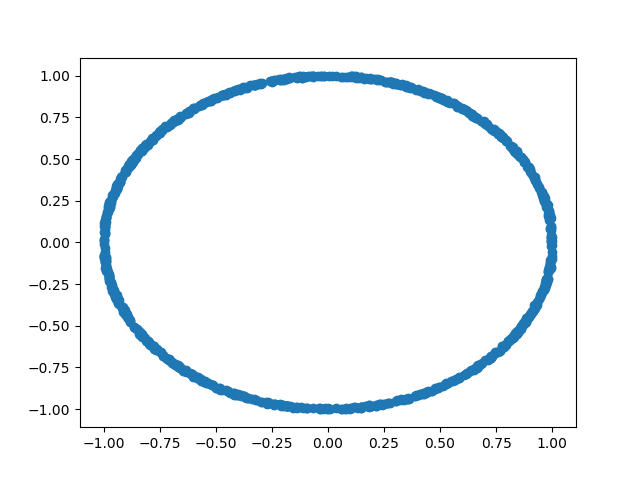

In [5]:
pts = sample_hyper(lambda x, y: x**2 + y**2 - 1, 2)
plt.scatter(pts[:,0], pts[:,1])

### Learn an atlas of two coordinate charts, each one-dimensional

In [6]:
at = atlas.Atlas(1,2)
at.fit(pts)

/Users/eric/Dropbox/cech/atlas.py:77: UserWarning: Output "loss" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "loss" during training.
  self.ae.compile(optimizer='rmsprop', loss=None)


Train on 819 samples, validate on 200 samples
Epoch 1/200
819/819 [==============================] - 0s - loss: 0.2375 - val_loss: 0.2168
Epoch 2/200
819/819 [==============================] - 0s - loss: 0.2062 - val_loss: 0.1906
Epoch 3/200
819/819 [==============================] - 0s - loss: 0.1813 - val_loss: 0.1677
Epoch 4/200
819/819 [==============================] - 0s - loss: 0.1603 - val_loss: 0.1495
Epoch 5/200
819/819 [==============================] - 0s - loss: 0.1439 - val_loss: 0.1354
Epoch 6/200
819/819 [==============================] - 0s - loss: 0.1315 - val_loss: 0.1252
Epoch 7/200
819/819 [==============================] - 0s - loss: 0.1227 - val_loss: 0.1176

### Get and plot the probabilities of the sampled points belonging to the first chart

<IPython.core.display.Javascript object>


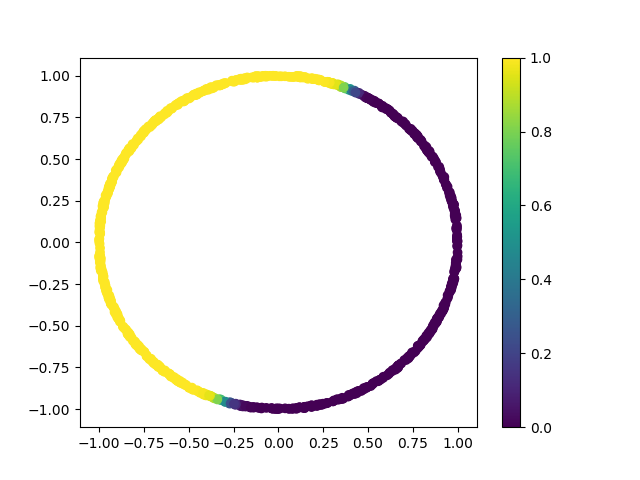

In [8]:
probs = at.chart_probs(pts)
sc = plt.scatter(pts[:,0],pts[:,1],c=probs[:,1])
plt.colorbar(sc)
plt.show()

### Generate points on the circle from the two charts

<IPython.core.display.Javascript object>


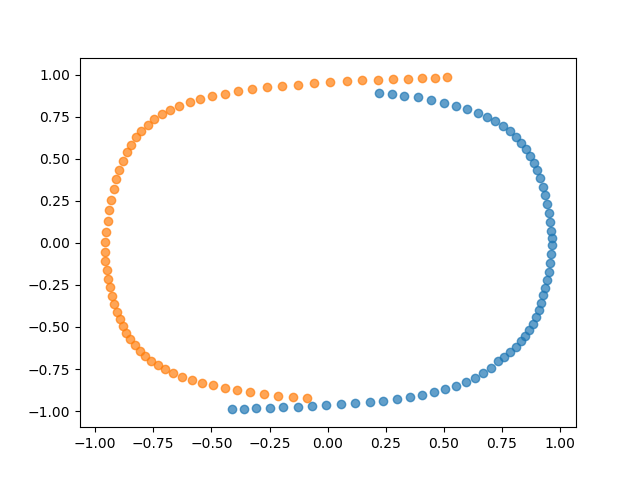

In [9]:
gendata = np.arange(-1,1,.03)
gendata = gendata.reshape((gendata.shape[0], 1))

preds1 = at.decode(0, gendata)
preds2 = at.decode(1, gendata)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(preds1[:,0], preds1[:,1], alpha=0.7)
ax.scatter(preds2[:,0], preds2[:,1], alpha=0.7)

# Charting a sphere

### Sample noisy points from the unit 2-sphere

<IPython.core.display.Javascript object>


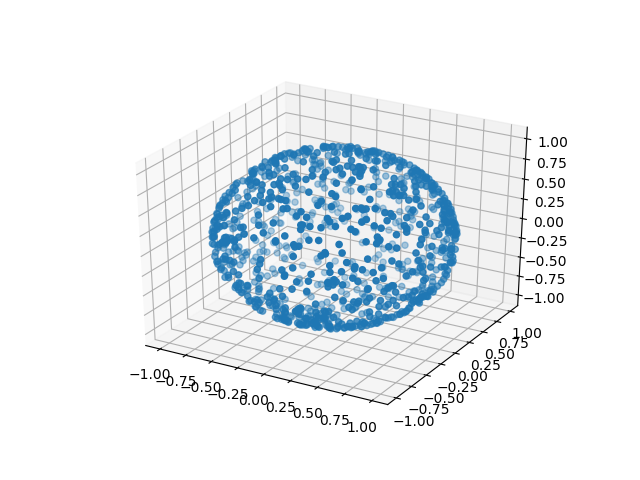

In [10]:
sphere_pts = sample_hyper(lambda x,y,z: x**2 + y**2 + z**2 - 1,3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphere_pts[:,0], sphere_pts[:,1], sphere_pts[:,2])

### Learn an atlas of three coordinate charts, each two-dimensional

In [13]:
at = atlas.Atlas(2,3)
at.fit(sphere_pts)

/Users/eric/Dropbox/cech/atlas.py:77: UserWarning: Output "loss" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "loss" during training.
  self.ae.compile(optimizer='rmsprop', loss=None)


Train on 813 samples, validate on 200 samples
Epoch 1/200
813/813 [==============================] - 0s - loss: 0.1606 - val_loss: 0.1501
Epoch 2/200
813/813 [==============================] - 0s - loss: 0.1430 - val_loss: 0.1350
Epoch 3/200
813/813 [==============================] - 0s - loss: 0.1279 - val_loss: 0.1202
Epoch 4/200
813/813 [==============================] - 0s - loss: 0.1134 - val_loss: 0.1066
Epoch 5/200
813/813 [==============================] - 0s - loss: 0.0997 - val_loss: 0.0941
Epoch 6/200
813/813 [==============================] - 0s - loss: 0.0876 - val_loss: 0.0832
Epoch 7/200
813/813 [==============================] - 0s - loss: 0.0777 - val_loss: 0.0741

### Plot the chart assignments

<IPython.core.display.Javascript object>


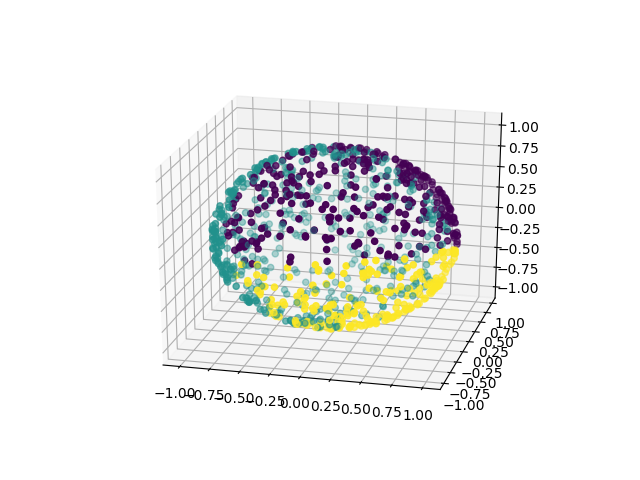

In [23]:
probs = at.chart_probs(sphere_pts)
chart_assignments = probs.argmax(axis=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphere_pts[:,0], sphere_pts[:,1], sphere_pts[:,2], c=chart_assignments)

### Generate points on the sphere from the three charts

<IPython.core.display.Javascript object>


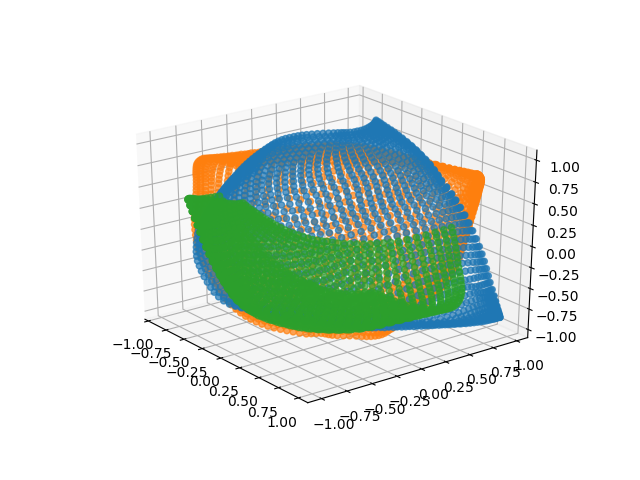

In [17]:
gendata = np.arange(-1,1,.05)
sq = np.array([[x,y] for x in gendata for y in gendata])

preds1 = at.decode(0, sq)
preds2 = at.decode(1, sq)
preds3 = at.decode(2, sq)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(preds1[:,0], preds1[:,1], preds1[:,2], alpha=0.7)
ax.scatter(preds2[:,0], preds2[:,1], preds2[:,2], alpha=0.7)
ax.scatter(preds3[:,0], preds3[:,1], preds3[:,2], alpha=0.7)

# Charting a torus

### Sample noisy points from the unit 2-sphere

<IPython.core.display.Javascript object>


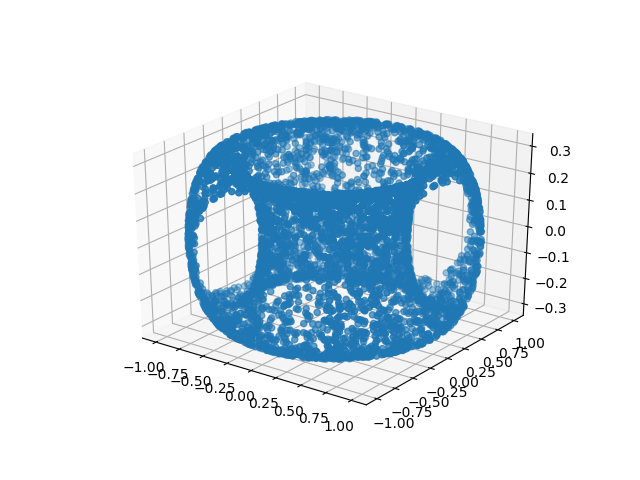

In [24]:
R = .9
r = R/3
torus_pts = sample_hyper(lambda x,y,z: (R - np.sqrt(x**2 + y**2))**2 + z**2 - r**2,3,eps=0.001, N=5000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_pts[:,0], torus_pts[:,1], torus_pts[:,2])
plt.show()

### Learn an atlas of four coordinate charts, each two-dimensional

In [25]:
at = atlas.Atlas(2,4)
at.fit(torus_pts)

/Users/eric/Dropbox/cech/atlas.py:77: UserWarning: Output "loss" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "loss" during training.
  self.ae.compile(optimizer='rmsprop', loss=None)


Train on 4082 samples, validate on 1000 samples
Epoch 1/200
4082/4082 [==============================] - 0s - loss: 0.1661 - val_loss: 0.1179
Epoch 2/200
4082/4082 [==============================] - 0s - loss: 0.0899 - val_loss: 0.0683

### Plot the chart assignments

<IPython.core.display.Javascript object>


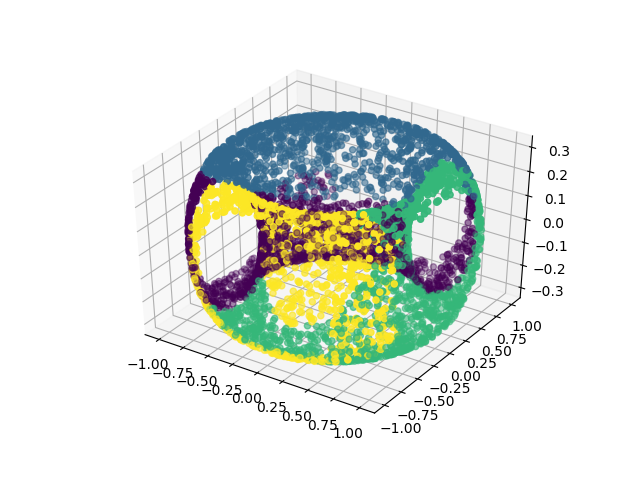

In [41]:
probs = at.chart_probs(torus_pts)
chart_assignments = probs.argmax(axis=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_pts[:,0], torus_pts[:,1], torus_pts[:,2], c=chart_assignments)

### Generate points on the torus from the three charts

<IPython.core.display.Javascript object>


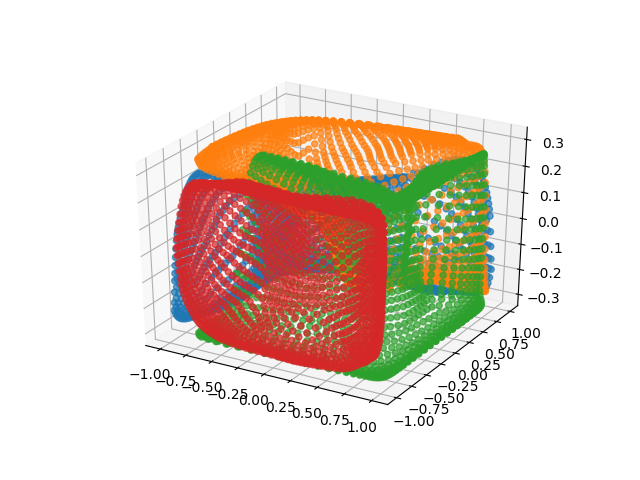

In [42]:
gendata = np.arange(-1,1,.05)
sq = np.array([[x,y] for x in gendata for y in gendata])

preds1 = at.decode(0, sq)
preds2 = at.decode(1, sq)
preds3 = at.decode(2, sq)
preds4 = at.decode(3, sq)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(preds1[:,0], preds1[:,1], preds1[:,2], alpha=0.7)
ax.scatter(preds2[:,0], preds2[:,1], preds2[:,2], alpha=0.7)
ax.scatter(preds3[:,0], preds3[:,1], preds3[:,2], alpha=0.7)
ax.scatter(preds4[:,0], preds4[:,1], preds4[:,2], alpha=0.7)